In [2]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 11.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


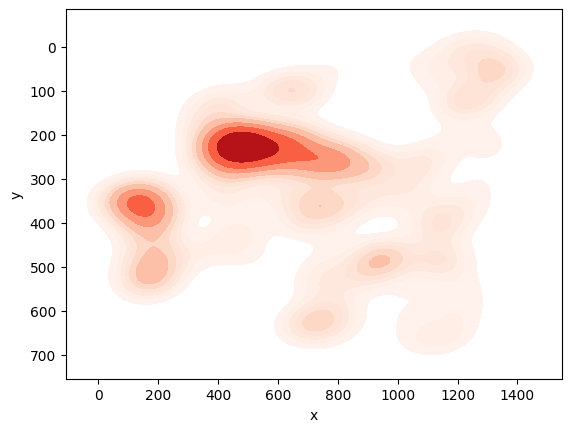

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("mouse_tracking_data (1).csv")

sns.kdeplot(
    x=df["x"],
    y=df["y"],
    fill=True,
    cmap="Reds",
    bw_adjust=0.5
)

plt.gca().invert_yaxis()
plt.show()


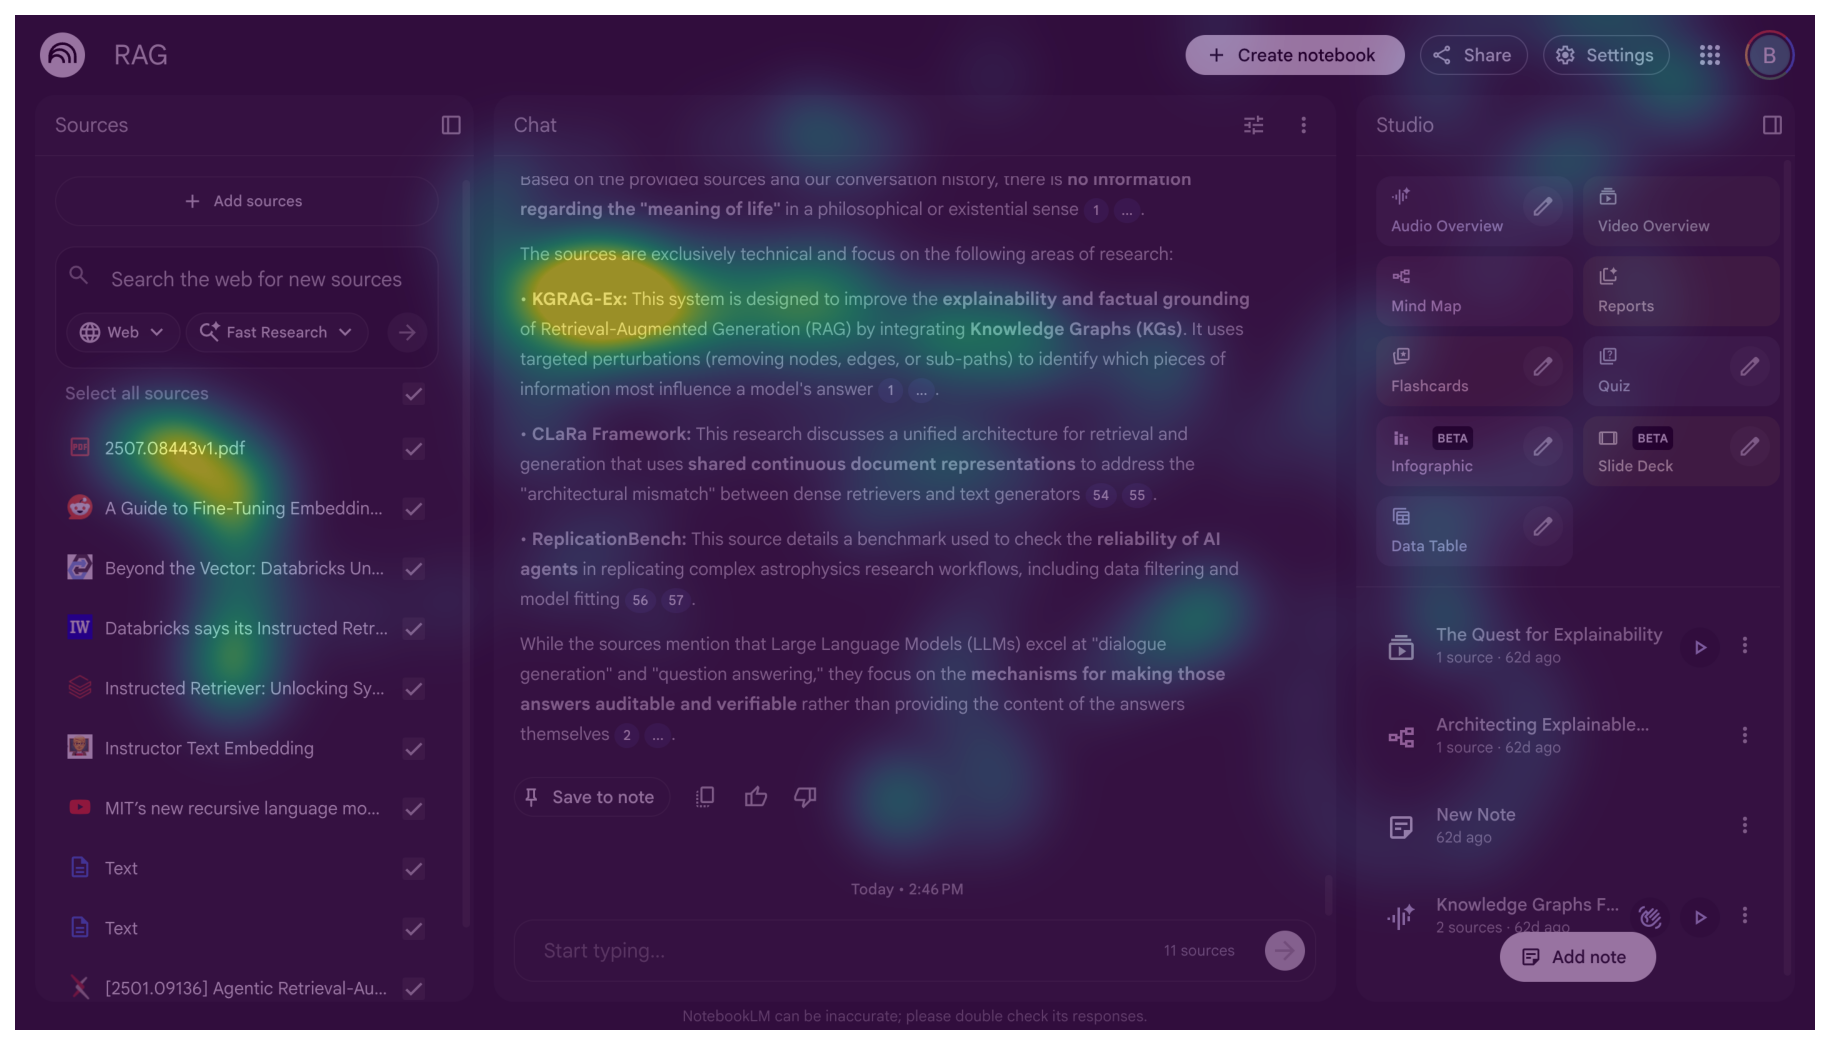

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import gaussian_filter

# ---- files ----
CSV_PATH = "mouse_tracking_data (1).csv"
IMG_PATH = "notebooklm.png"

# ---- IMPORTANT: set this to your window.devicePixelRatio ----
DPR = 2  # change to 1 if console shows 1

# Load data
df = pd.read_csv(CSV_PATH)

# Load screenshot
img = mpimg.imread(IMG_PATH)
H, W = img.shape[0], img.shape[1]

# Scale mouse coords from CSS pixels -> image pixels
x = (df["x"].to_numpy() * DPR).astype(float)
y = (df["y"].to_numpy() * DPR).astype(float)

# Keep only points inside the screenshot bounds
mask = (x >= 0) & (x < W) & (y >= 0) & (y < H)
x = x[mask]
y = y[mask]

# ---- Build a density map on the same pixel grid as the screenshot ----
# 2D histogram (counts per pixel-bin)
heat, _, _ = np.histogram2d(y, x, bins=[H, W], range=[[0, H], [0, W]])

# Smooth to look like a heatmap (tune sigma; 30–80 is typical)
sigma = 55
heat_smooth = gaussian_filter(heat, sigma=sigma)

# Normalize for display (robust normalization)
vmax = np.percentile(heat_smooth, 99.5)  # avoids one hotspot washing everything out

# ---- Plot ----
plt.figure(figsize=(12, 8), dpi=150)
plt.imshow(img, origin="upper")
plt.imshow(heat_smooth, origin="upper", alpha=0.55, vmin=0, vmax=vmax)  # overlay
plt.axis("off")
plt.tight_layout(pad=0)

# Save publication figure
plt.savefig("notebooklm_mouse_heatmap_overlay.png", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()
